## Nilearn 101

We Will do a few steps before we start coding. Most of them are one-time steps, but can be use more than once if needed.
### 1. Create Anaconda environment:
- Start Anaconda navigator
- Go to environments
- Add new
- install pandas, numpy (using Anaconda)
- install nielarn
- Go to terminal 
- <code>conda install -c conda-forge nilearn</code>
### 2. Create a git repository:
- Go to github and login
- Add new repository (call it whatever you like)
- Copy the repository link
### 3. Clone the repository in computer
- Go to terminal (use conda)
- git clone [link to github]
- Set user name and email (one time setup)
- <code>git config --global user.email "my@email.com"</code>
- <code>git config --global user.name "My Name"</code>
### 4. Start coding!
        

In [1]:
print('Hello World!')

Hello World!


In [4]:
name = "Ifat"
print(f"Hello {name}!")

Hello Ifat!


In [7]:
import numpy as np # numpy is arrays and matrices computation in python
import pandas as pd # pandas deals with dataframes in python
import nilearn # neuro machine learning
import nilearn.plotting # specfic package in nilearn
import matplotlib.pyplot as plt # for plotting

### Let's plot a beta map and zmap

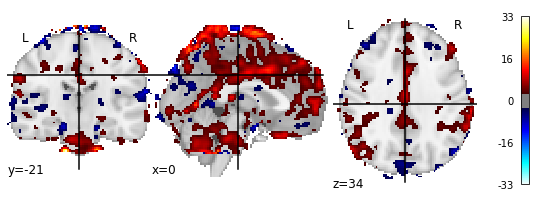

In [12]:
bmap = r"\\172.21.64.190\data\work\RV_FSL\Sink_respNOScrub\1stLevel\_subject_id_1205\results\cope1.nii.gz"
nilearn.plotting.plot_stat_map(bmap, threshold = 3) # adding threshold

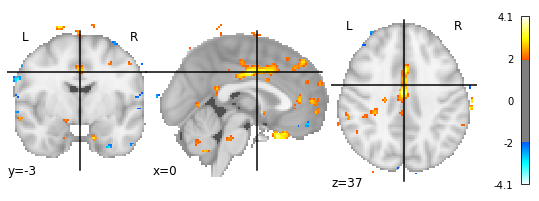

In [6]:
zmap = r"\\172.21.64.190\data\work\RV_FSL\Sink_respNOScrub\1stLevel\_subject_id_1205\results\zstat1.nii.gz"
nilearn.plotting.plot_stat_map(zmap, threshold = 2) # adding threshold

## Now lets plot a timeline
- first we need to decide how to extract (all voxels? specific ROI? parcellatation?)
- Nilean has all those options using the NiftiMasker
- You can look here: http://nilearn.github.io/
- Specifically: http://nilearn.github.io/modules/reference.html#module-nilearn.masking

### We will first take a sphere

#### Then we will use parcellation
- we will use DifuMo but we can use anything

In [7]:
import nilearn.input_data
coords = [[12, 56, 4]]
tr = 2 # neurofeedback TR - but should check first
masker = nilearn.input_data.NiftiSpheresMasker(seeds=coords, radius = 5,
                                              smoothing_fwhm=5, standardize=True,
                                            detrend=True, t_r=tr, high_pass=.01, low_pass=.1, 
                                               memory_level=5, memory = "nilearn",
                                        verbose = 9
                                             ).fit()

In [8]:
#file = r"//172.21.64.190/data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_BIDS/derivatives/fmriprep/sub-1223/ses-2/func/sub-1223_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
#file = r"C:\Users\Or Duek\Downloads\workshop\func_files\sub-1561_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
file_nf = r"//172.21.64.190/data/Lab_Knowledge/nilearnWorkshop/workshop/func_NF/sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"
vector = masker.transform(file_nf)

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('//172.21.64.190/data/Lab_Knowledge/nilearnWorkshop/workshop/func_NF/sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': False,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 5,
  'seeds': [[12, 56, 4]],
  'smoothing_fwhm': 5,
  'standardize': True,
  't_r': 2}, confounds=None, dtype=None, memory=Memory(location=nilearn\joblib), memory_level=5, verbose=9)
[NiftiSpheresMasker.transform_single_imgs] Loading data from //172.21.64.190/data/Lab_Knowledge/nilearnWorkshop/workshop/func_NF/sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Smoothing images
________________________________________________________________________________
[Memo

C:\Users\Or Duek\anaconda3\envs\neuroAnalysis\lib\site-packages\nilearn\input_data\base_masker.py:91: UserWarning: Persisting input arguments took 1.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  imgs = cache(


______________________________________________________smooth_img - 18.6s, 0.3min
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_spheres_masker.nifti_spheres_masker_extractor...
nifti_spheres_masker_extractor(<nibabel.nifti1.Nifti1Image object at 0x0000020AB3EA3FD0>)
__________________________________nifti_spheres_masker_extractor - 18.2s, 0.3min
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.signal.clean...
clean(array([[843.897216],
       ...,
       [839.981468]]), detrend=True, standardize=True, t_r=2, low_pass=0.1, high_pass=0.01, confounds=None, sessions=None)
____________________________________________________________clean - 0.0s, 0.0min
_____________________________________________filter_and_extract - 193.4s

C:\Users\Or Duek\anaconda3\envs\neuroAnalysis\lib\site-packages\nilearn\input_data\base_masker.py:98: UserWarning: Persisting input arguments took 4.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,


In [12]:
# lets see the shape
vector.shape

(150, 1)

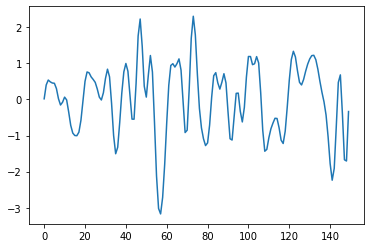

In [13]:
# plot this timeline
plt.plot(vector)

### Well nice but problematic - we didn't account for confounds etc. Lets do that
1. Read confound file
    - Pick relevant regresors
2. Read preproc image file
run the same masker

In [14]:
# load regressor file
#confound_file = r"C:\Users\Or Duek\Downloads\workshop\fun"
confound_file = r"//172.21.64.190/data/Lab_Knowledge/nilearnWorkshop/workshop/func_NF/sub-1527_ses-1_task-rest1_desc-confounds_regressors.tsv"
conf = pd.read_csv(confound_file, sep = "\t")
conf.columns

Index(['csf', 'csf_derivative1', 'csf_derivative1_power2', 'csf_power2',
       'white_matter', 'white_matter_derivative1', 'white_matter_power2',
       'white_matter_derivative1_power2', 'global_signal',
       'global_signal_derivative1',
       ...
       'aroma_motion_06', 'aroma_motion_09', 'aroma_motion_12',
       'aroma_motion_18', 'aroma_motion_19', 'aroma_motion_20',
       'aroma_motion_22', 'aroma_motion_23', 'aroma_motion_25',
       'aroma_motion_27'],
      dtype='object', length=199)

In [15]:
# take only relevant variables from confound file
confounds = conf[["csf","white_matter", "framewise_displacement", 
                 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']]
confounds = confounds.fillna(0) # change NA to 0, as madker neeeds

In [16]:
# load parcellation 
#atlas_img = r'//172.21.64.190/data/work/DiFuMo_atlas/64/maps.nii.gz'
atlas_img = r"C:\Users\Or Duek\Downloads\workshop\atlas\64\maps.nii.gz"
import nilearn.input_data
masker = nilearn.input_data.NiftiMapsMasker(maps_img=atlas_img,
                                            smoothing_fwhm=5, standardize=True,
                                            detrend=True, t_r=tr, high_pass=.01, low_pass=.1, memory_level=9,
                                            memory = "nilearn",
                                        verbose = 9).fit()

[NiftiMapsMasker.fit] loading regions from C:\Users\Or Duek\Downloads\workshop\atlas\64\maps.nii.gz


In [17]:
file_nf = r"C:\Users\Or Duek\Downloads\workshop\func_NF\sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"
matrix = masker.transform(file_nf, confounds=np.array(confounds))

Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x0000020AAF67F220>, interpolation='continuous', target_shape=(97, 115, 97), target_affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]]))


C:\Users\Or Duek\anaconda3\envs\neuroAnalysis\lib\site-packages\nilearn\input_data\nifti_maps_masker.py:277: UserWarning: Persisting input arguments took 1.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  self._resampled_maps_img_ = self._cache(image.resample_img)(


____________________________________________________resample_img - 21.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(('C:\\Users\\Or '
 'Duek\\Downloads\\workshop\\func_NF\\sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'), 
{ 'allow_overlap': True,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'maps_img': 'C:\\Users\\Or Duek\\Downloads\\workshop\\atlas\\64\\maps.nii.gz',
  'mask_img': None,
  'smoothing_fwhm': 5,
  'standardize': True,
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=array([[ 9.575894e+02, ...,  0.000000e+00],
       ...,
       [ 9.551322e+02, ..., -1.448450e-03]]), dtype=None, memory=Memory(location=nilearn\joblib), memory_level=9, verbose=9)
[NiftiMapsMasker.transform_single_imgs] Loading data from C:\Users\Or Duek\Downloads\workshop\func_NF\sub

C:\Users\Or Duek\anaconda3\envs\neuroAnalysis\lib\site-packages\nilearn\input_data\base_masker.py:91: UserWarning: Persisting input arguments took 2.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  imgs = cache(


______________________________________________________smooth_img - 21.7s, 0.4min
[NiftiMapsMasker.transform_single_imgs] Extracting region signals
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_maps_masker.nifti_maps_masker_extractor...
nifti_maps_masker_extractor(<nibabel.nifti1.Nifti1Image object at 0x0000020AB50C2FD0>)


C:\Users\Or Duek\anaconda3\envs\neuroAnalysis\lib\site-packages\nilearn\input_data\base_masker.py:98: UserWarning: Persisting input arguments took 5.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,


_____________________________________nifti_maps_masker_extractor - 29.3s, 0.5min
[NiftiMapsMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.signal.clean...
clean(array([[2032128.844475, ..., 1812235.815031],
       ...,
       [2039377.292825, ..., 1793673.710993]]), detrend=True, standardize=True, t_r=2, low_pass=0.1, high_pass=0.01, confounds=array([[ 9.575894e+02, ...,  0.000000e+00],
       ...,
       [ 9.551322e+02, ..., -1.448450e-03]]), sessions=None)
____________________________________________________________clean - 0.0s, 0.0min
______________________________________________filter_and_extract - 66.4s, 1.1min


C:\Users\Or Duek\anaconda3\envs\neuroAnalysis\lib\site-packages\nilearn\input_data\nifti_maps_masker.py:319: UserWarning: Persisting input arguments took 1.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


In [18]:
# what is the shape?
matrix.shape

(150, 64)

### Now lets create a connectivity matrix

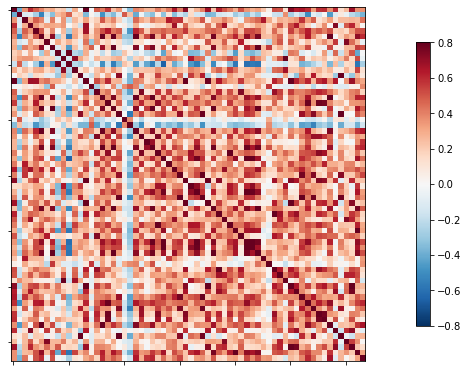

In [21]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([matrix])[0]

nilearn.plotting.plot_matrix(correlation_matrix,  colorbar=True,
                     vmax=0.8, vmin=-0.8)

In [23]:
labels = pd.read_csv(r'C:\Users\Or Duek\Downloads\workshop\atlas\64\labels_64_dictionary.csv')
labelsD = np.array(labels.Difumo_names)

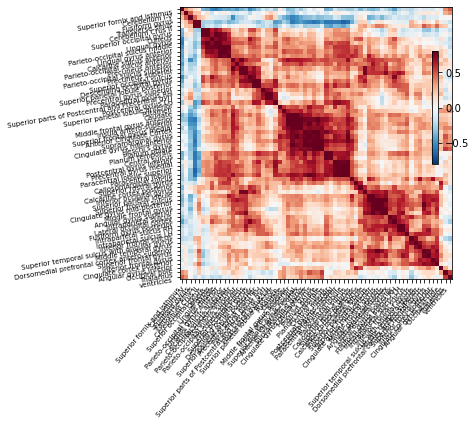

In [24]:
nilearn.plotting.plot_matrix(correlation_matrix, labels=labelsD, colorbar=True,
                     vmax=0.8, vmin=-0.8,
                            reorder=True)

C:\Users\Or Duek\anaconda3\envs\neuroAnalysis\lib\site-packages\nilearn\plotting\matrix_plotting.py:12: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  ylabel_width = ax.yaxis.get_tightbbox(renderer).inverse_transformed(
C:\Users\Or Duek\anaconda3\envs\neuroAnalysis\lib\site-packages\nilearn\plotting\matrix_plotting.py:20: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  xlabel_height = ax.xaxis.get_tightbbox(renderer).inverse_transformed(


<Figure size 432x288 with 0 Axes>

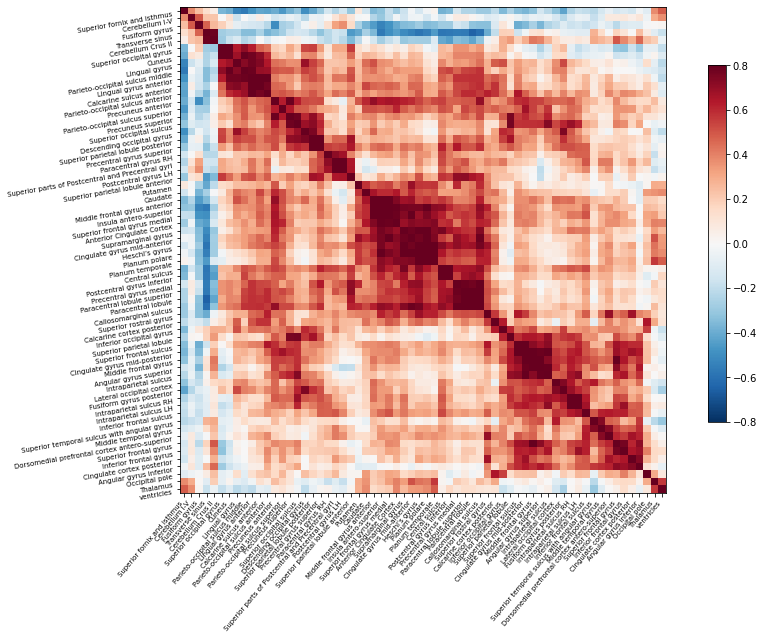

In [33]:
plt.figure()
nilearn.plotting.plot_matrix(correlation_matrix, labels=labelsD, colorbar=True,
                     vmax=0.8, vmin=-0.8, figure = (10,10),
                            reorder=True)

### Masking tmap
- If we want to use a previously defined ROI to test after 1st level analysis
    1. Download ROI (neurosynth is a good resource)
    2. Set a masker with nilearn
    3. fit transform like all previously shown

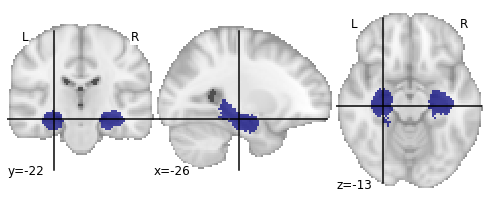

In [5]:
hip_file = r"//172.21.64.190/data/Lab_Knowledge/nilearnWorkshop/workshop/mask/hippocampus_association-test_z_FDR_0.01.nii.gz"
mask_file = nilearn.image.math_img("a>=10", a=hip_file)
%matplotlib inline 
# this is in case you can't see the plots - specific to jupyter notebook
nilearn.plotting.plot_roi(mask_file)

In [10]:
from nilearn import input_data
masker = input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=2, standardize=True, detrend=False, verbose=9).fit()

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


In [13]:
# now we take the beta image and fit
fitB = masker.transform(bmap)

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


C:\Users\Or Duek\anaconda3\envs\neuroAnalysis\lib\site-packages\nilearn\signal.py:61: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [14]:
fitB.shape

(1, 2470)

<AxesSubplot:>

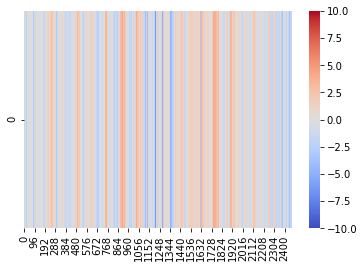

In [15]:
import seaborn as sns # another plotting package
sns.heatmap(fitB, vmax=10, vmin = -10, cmap="coolwarm")


#### we can plot it on the brain

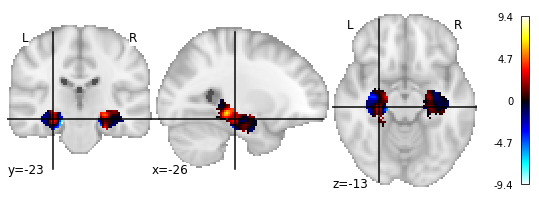

In [16]:
# take the vector back to the brain
img = masker.inverse_transform(fitB) # take the masker and transform back to brain
nilearn.plotting.plot_stat_map(img) # we can use different graphs for that

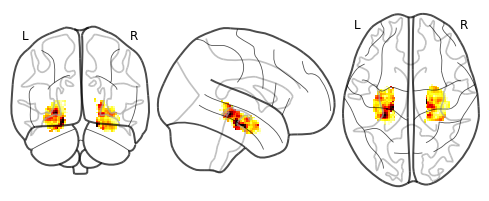

In [17]:
# glass brain
nilearn.plotting.plot_glass_brain(img)

In [21]:
# interactive plot
view = nilearn.plotting.view_img(img, threshold=3)
view
# can save as html
#view.save_as_html('hippoActivation.html')


In [49]:
# we can save what we did as nifti file
img.to_filename("myFirstNifti.nii.gz")

### It is time to update our github repository
- We might consider doing it before while scripting
- Lets go back to terminal
- Go to our git folder
- <code>git add "filename"</code> 
- <code>git commit -m "message to remind us what we've changes"</code>
- <code>git push origin master</code> 

We can see that the file was updated in github